In [21]:
%reset
from __future__ import print_function
from numpy import *
from scipy import *

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import reload
import matplotlib.patches as patches

import netCDF4 as nc
import numpy as np
import scipy as sp

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

# matplotlib.use('Agg')
# plt.style.use('seaborn-whitegrid')
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs

from scipy import optimize
import arrow
import gsw
import pandas as pd
import xarray as xr
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [22]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<div style=”page-break-after: always;”></div>

## pres-day BC - preindustrial BC, 15th of each month
## Intrusion method on top, AOU method (not zeroed, 1:1 with DIC) on bottom

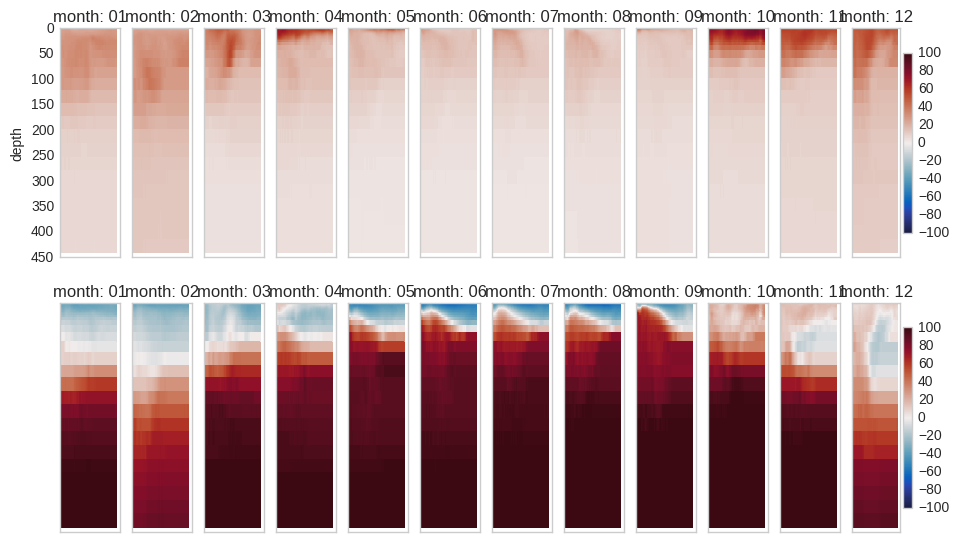

In [24]:
m = ['01','02','03','04','05','06','07','08','09','10','11','12']
yday_list = []
for i in range(0,12):
    t_yday = 'y2015m' + m[i] + 'd15'
    yday_list.append(t_yday)

yday = 'y2015m01d15'
intrusion_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/intrusion/LO_intrusion_{yday}_preind_DIC.nc')
AOU_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/AOU_nozero/LO_AOUmethod_notzeroed_{yday}_preind_DIC.nc')
LO_DIC = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{yday}.nc')
loDIC = LO_DIC['DIC'][0,:,0,:]
iDIC_n = intrusion_DIC_new['preindustrial_DIC']['preind_dic'][:]
ADIC_n = AOU_DIC_new['preindustrial_DIC']['preind_dic'][:]

test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])

fig = plt.figure(figsize=(11,6.5))
nop = 24
for i in range(1,nop+1):
    if i<13:
        yday = yday_list[i-1]
    if i>12:
        yday = yday_list[i-13]

    intrusion_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/intrusion/LO_intrusion_{yday}_preind_DIC.nc')
    AOU_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/AOU_nozero/LO_AOUmethod_notzeroed_{yday}_preind_DIC.nc')
    LO_DIC = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{yday}.nc')
    loDIC = LO_DIC['DIC'][0,:,0,:]
    iDIC_n = intrusion_DIC_new['preindustrial_DIC']['preind_dic'][:]
    ADIC_n = AOU_DIC_new['preindustrial_DIC']['preind_dic'][:]

    test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
    zlevels = (test_LO['deptht'][:])
    
    ax = fig.add_subplot(2,12,i)
    section_slice = np.arange(0, 95)
    if i <13:
        sd = (loDIC - iDIC_n)
        ax.set_title('month: '+str(m[i-1]))
    if i >12:
        sd = (loDIC - ADIC_n)
        ax.set_title('month: '+str(m[i-13]))
    tplt = np.ma.masked_values(sd,0)
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=-100, vmax=100)
    if (i == 12) | (i == 24):
        cbar = fig.colorbar(mesh, ax=ax)
    ax.invert_yaxis()
    land_colour = 'slategrey'
    cmap.set_bad(land_colour)
    
    if i == 1:
        ax.set_ylabel('depth')
    if ((i != 1)):
        ax.set_yticklabels([])
    ax.set_xticklabels([])

## AOU and pco2 disequilibrium, 15th of each month

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


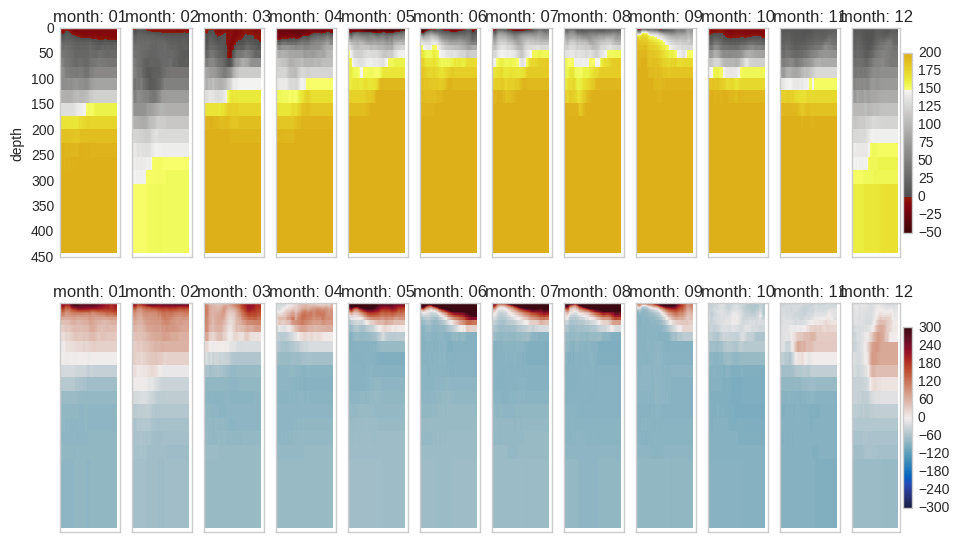

In [28]:
m = ['01','02','03','04','05','06','07','08','09','10','11','12']
yday_list = []
for i in range(0,12):
    t_yday = 'y2015m' + m[i] + 'd15'
    yday_list.append(t_yday)

yday = 'y2015m01d15'
intrusion_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/intrusion/LO_intrusion_{yday}_preind_DIC.nc')
AOU_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/AOU_nozero/LO_AOUmethod_notzeroed_{yday}_preind_DIC.nc')
LO_DIC = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{yday}.nc')
loDIC = LO_DIC['DIC'][0,:,0,:]
iDIC_n = intrusion_DIC_new['preindustrial_DIC']['preind_dic'][:]
ADIC_n = AOU_DIC_new['preindustrial_DIC']['preind_dic'][:]

test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])

fig = plt.figure(figsize=(11,6.5))
nop = 24
for i in range(1,nop+1):
    print(i)
    if i<13:
        yday = yday_list[i-1]
    if i>12:
        yday = yday_list[i-13]

    intrusion_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/intrusion/LO_intrusion_{yday}_preind_DIC.nc')
    AOU_DIC_new = nc.Dataset(f'/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/CLEAN/preind_DIC/AOU_nozero/LO_AOUmethod_notzeroed_{yday}_preind_DIC.nc')
    LO_DIC = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{yday}.nc')
    AOU = AOU_DIC_new['preindustrial_DIC']['AOU'][:]
    diseq_pco2 = AOU_DIC_new['preindustrial_DIC']['preformed_pco2'][:] - \
    AOU_DIC_new['preindustrial_DIC']['pycnal_witnessed_atm_co2'][:]
    test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
    zlevels = (test_LO['deptht'][:])
    
    ax = fig.add_subplot(2,12,i)
    section_slice = np.arange(0, 95)
    if i <13:
        sd = (AOU)
        tplt = np.ma.masked_values(sd,0)
        ax.set_title('month: '+str(m[i-1]))
        tcmap = cm.cm.oxy
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=-50, vmax=200)

    if i >12:
        sd = (diseq_pco2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=-300, vmax=300)

        ax.set_title('month: '+str(m[i-13]))
 
    if (i == 12) | (i == 24):
        cbar = fig.colorbar(mesh, ax=ax)
    ax.invert_yaxis()
    land_colour = 'slategrey'
    cmap.set_bad(land_colour)
    
    if i == 1:
        ax.set_ylabel('depth')
    if ((i != 1)):
        ax.set_yticklabels([])
    ax.set_xticklabels([])